In [1]:
import pickle 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from datetime import datetime
import matplotlib.pyplot as plt 


Defining the interval of evaluation of the models:

In [2]:
ini_evaluate_re = '2021-01-03'
end_evaluate_re = '2022-01-02'
ini_evaluate_jp = '2021-01-03'
end_evaluate_jp = '2023-01-01'
ini_evaluate_fo = '2022-01-02'
end_evaluate_fo = '2023-01-01'
ini_evaluate_rj = '2018-09-30'
end_evaluate_rj = '2019-12-01'

In [3]:
def get_df_dengue_chik(city):
    df_dengue = pd.read_csv(f'../data/dengue_{city}_cluster.csv', index_col = 'Unnamed: 0' )
    df_dengue.index = pd.to_datetime(df_dengue.index)
    
    df_chik = pd.read_csv(f'../data/chik_{city}_cluster.csv', index_col = 'Unnamed: 0' )
    df_chik.index = pd.to_datetime(df_chik.index)
    
    return df_dengue, df_chik 

In [4]:
def plot_incidence():
    
    fig, axs = plt.subplots(2, 2, figsize=(16,12))
    
    city = 2611606
    
    city_name = 'Recife'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[0, 0].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[0, 0].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[0, 0].set_xlabel('date')
    
    axs[0, 0].grid()
    
    axs[0, 0].legend()
    
    axs[0, 0].set_title(city_name)
    
    city = 2507507
    
    city_name = 'João Pessoa'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[0, 1].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[0, 1].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[0, 1].set_xlabel('date')
    
    axs[0, 1].grid()
    
    axs[0, 1].legend()
    
    axs[0, 1].set_title(city_name)
    
    city = 2304400
    
    city_name = 'Fortaleza'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[1, 0].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[1, 0].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[1, 0].set_xlabel('date')
    
    axs[1, 0].grid()
    
    axs[1, 0].legend()
    
    axs[1, 0].set_title(city_name)
    
    city = 3304557
    
    city_name = 'Rio de Janeiro'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[1, 1].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[1, 1].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[1, 1].set_xlabel('date')
    
    axs[1, 1].grid()
    
    axs[1, 1].legend()
    
    axs[1, 1].set_title(city_name)
    
    plt.savefig(f'../figures/incidence.png',bbox_inches='tight',  dpi = 300)
    
    plt.show()

    return 
    
    

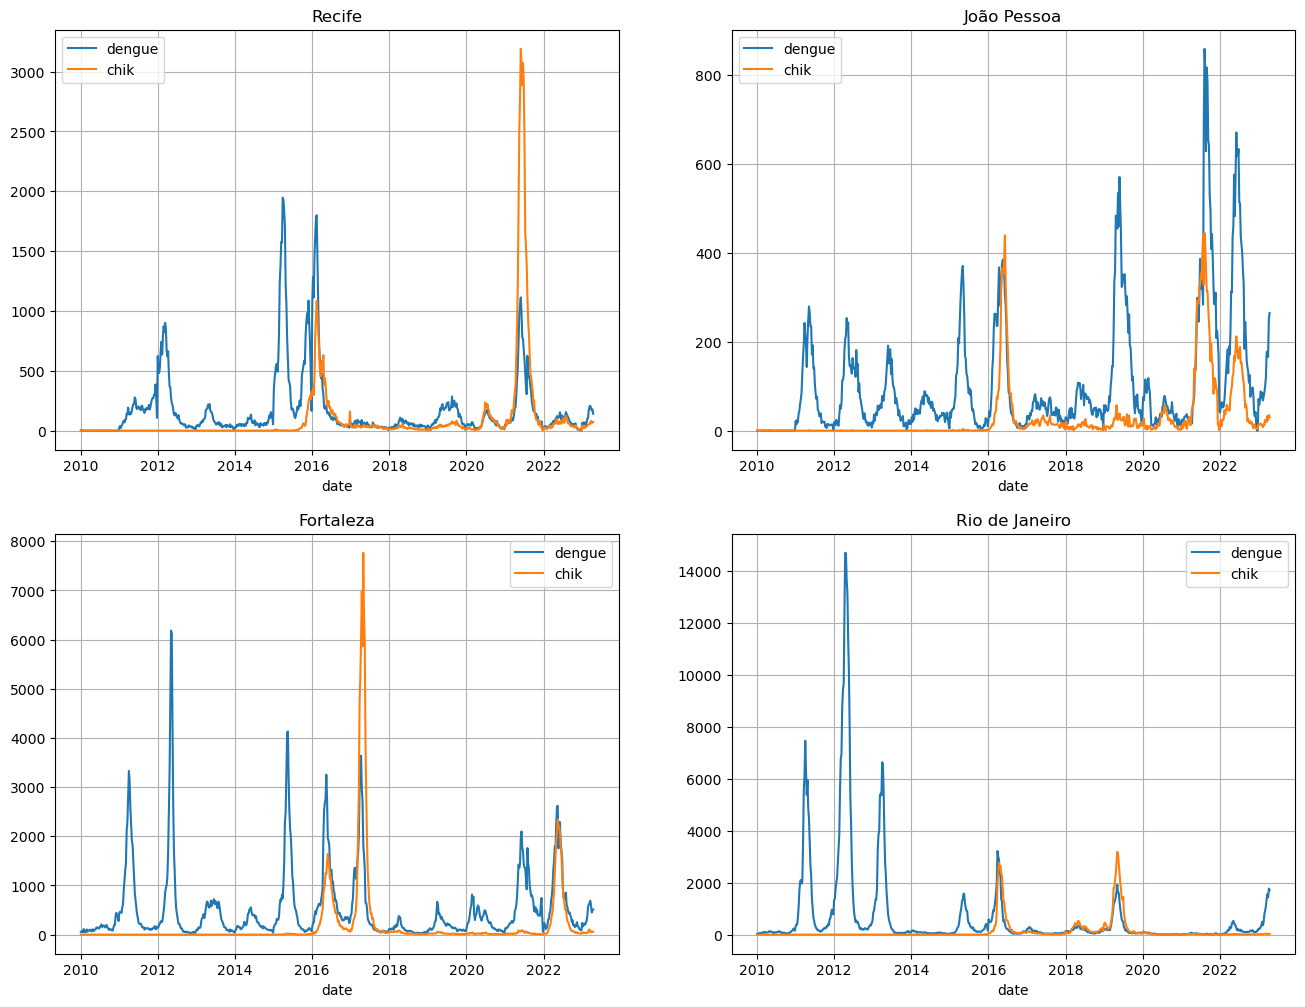

In [5]:
plot_incidence()

In [20]:
def plot_dengue_test(ax, city, doenca, label, title, ini_evaluate, end_evaluate):
    
    
    data_ml = pickle.load(open(f'../predictions/pgbm/pgbm_{city}_{doenca}_all_predictions.pkl', 'rb'))
    
    data_nn = pickle.load(open(f'../predictions/lstm/lstm_{city}_{doenca}_msle_all.pkl', 'rb'))
    
    ini_index = data_nn['indice'].index(datetime.strptime(ini_evaluate, '%Y-%m-%d'))
    end_index = data_nn['indice'].index(datetime.strptime(end_evaluate, '%Y-%m-%d'))
    
    ini_index_ml = data_ml['dates'].index(datetime.strptime(ini_evaluate, '%Y-%m-%d'))
    end_index_ml = data_ml['dates'].index(datetime.strptime(end_evaluate, '%Y-%m-%d'))
    
    ax.plot(data_nn['indice'][ini_index:end_index], data_nn['target'][ini_index - 7: end_index - 7, -1] * data_nn['factor'] , color = 'black', label = 'data', linewidth=2)

    ax.plot(data_nn['indice'][ini_index:end_index],data_nn['pred'].iloc[ini_index - 7: end_index - 7,-1] * data_nn['factor'], label = 'NN', ls = 'dashed', linewidth=2)

    ax.fill_between(data_nn['indice'][ini_index:end_index], data_nn['lb'].iloc[ini_index - 7: end_index - 7,-1] * data_nn['factor'], data_nn['ub'].iloc[ini_index - 7: end_index - 7,-1] * data_nn['factor'], color = 'tab:blue', alpha = 0.2)

    ax.plot(data_ml['dates'][ini_index_ml:end_index_ml],data_ml['preds'][ini_index_ml: end_index_ml], label = 'ML', ls = 'dotted', linewidth=2)

    ax.fill_between(data_ml['dates'][ini_index_ml:end_index_ml],data_ml['preds25'][ini_index_ml: end_index_ml], data_ml['preds975'][ini_index_ml: end_index_ml],
                      color = 'tab:orange', alpha = 0.2)

    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(15)

    
    return 

In [21]:
def plot_dengue_all():
    
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")
    
    # recife
    city = 2611606
    plot_dengue_test(axd['a'], city, doenca = 'dengue', label = 'msle', title = 'Recife - dengue incidence (test sample)', ini_evaluate = ini_evaluate_re, end_evaluate = end_evaluate_re)
   
    # joao pessoa
    city = 2507507
    plot_dengue_test(axd['b'], city, doenca = 'dengue', label = 'msle', title = 'João Pessoa - dengue incidence (test sample)', ini_evaluate =ini_evaluate_jp, end_evaluate = end_evaluate_jp)
   
    # fortaleza
    city = 2304400
    plot_dengue_test(axd['c'], city, doenca = 'dengue', label = 'msle', title = 'Fortaleza - dengue incidence (test sample)', ini_evaluate =ini_evaluate_fo,  end_evaluate =end_evaluate_fo)
   
    # Rio de Janeiro
    city = 3304557
    plot_dengue_test(axd['d'], city, doenca = 'dengue', label = 'msle', title = 'Rio de Janeiro - dengue incidence (test sample)',ini_evaluate = ini_evaluate_rj,  end_evaluate = end_evaluate_rj)
   
    fig.savefig(f'../figures/dengue_bi_lstm.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    plt.show()

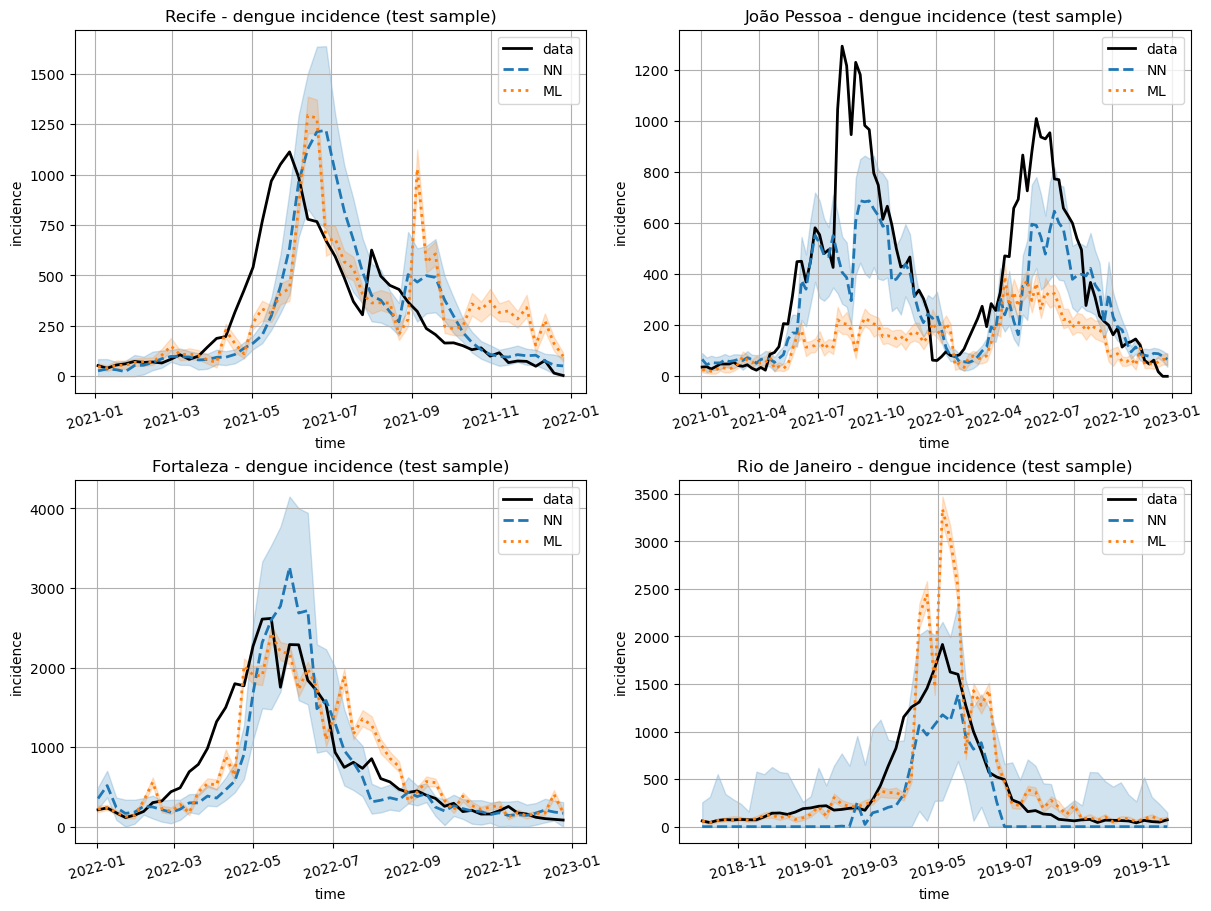

In [22]:
plot_dengue_all()

In [23]:
def get_preds(CITY):
    with open(f'../predictions/lstm/lstm_{CITY}_chik_predictions_msle_all.pkl', 'rb') as f:
        data_nn = pickle.load(f)
    
    doenca = 'dengue'
    with open(f'../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
            data_ml = pickle.load(f)

    with open(f'../predictions/lstm/tl_{CITY}_transf_msle.pkl', 'rb') as f:
            data_tl = pickle.load(f)
            
    return data_nn, data_ml, data_tl 

def plot_comp(ax, city, ini_evaluate, end_evaluate, title): 
    
    data_nn, data_ml, data_tl = get_preds(city)

    ini_index = data_nn['indice'].index(datetime.strptime(ini_evaluate, '%Y-%m-%d'))
    end_index = data_nn['indice'].index(datetime.strptime(end_evaluate, '%Y-%m-%d'))

    ax.plot(data_nn['indice'][ini_index:end_index], data_nn['target'][ini_index - 7: end_index - 7, -1] * data_nn['factor'] , color = 'black', label = 'data', linewidth=2)

    ax.plot(data_nn['indice'][ini_index:end_index],data_nn['pred'].iloc[ini_index - 7: end_index - 7,-1] * data_nn['factor'], label = 'NN', ls = 'dashed', linewidth=2)
    
    ax.fill_between(data_nn['indice'][ini_index:end_index],data_nn['lb'].iloc[ini_index - 7: end_index - 7,-1] * data_nn['factor'],
                    data_nn['ub'].iloc[ini_index - 7: end_index - 7,-1] * data_nn['factor'], 
                    alpha = 0.2)
    
    
    ax.plot(data_tl['indice'][ini_index:end_index], data_tl['pred'].iloc[ini_index - 7: end_index - 7,-1] * data_tl['factor'], label = f'TL', linewidth=2,
                        color = 'tab:red', ls = 'dashdot')
    
    ax.fill_between(data_tl['indice'][ini_index:end_index], data_tl['pred25'].iloc[ini_index - 7: end_index - 7,-1] * data_tl['factor'], 
                    data_tl['pred975'].iloc[ini_index - 7: end_index - 7,-1] * data_tl['factor'],
                        color = 'tab:red', alpha = 0.2)

    ini_index_ml = data_ml['dates'].index(datetime.strptime(ini_evaluate, '%Y-%m-%d'))
    end_index_ml = data_ml['dates'].index(datetime.strptime(end_evaluate, '%Y-%m-%d'))

    ax.plot(data_ml['dates'][ini_index_ml:end_index_ml],data_ml['preds'][ini_index_ml: end_index_ml], label = 'ML', ls = 'dotted', linewidth=2)
    
    ax.fill_between(data_ml['dates'][ini_index_ml:end_index_ml],data_ml['preds25'][ini_index_ml: end_index_ml],
                   data_ml['preds975'][ini_index_ml: end_index_ml], alpha = 0.2, color = 'tab:orange')

    ax.grid()
    
    ax.legend()
    
    ax.set_title(f'Chik predictions at {title}')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

def plot_comp_all():
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")

    plot_comp(axd['a'], 2611606, ini_evaluate = ini_evaluate_re, 
            end_evaluate = end_evaluate_re, title = 'Recife')
    
    plot_comp(axd['b'], 2507507, ini_evaluate = ini_evaluate_jp, 
            end_evaluate = end_evaluate_jp, title = 'João Pessoa')
    
    plot_comp(axd['c'], 2304400, ini_evaluate = ini_evaluate_fo, 
            end_evaluate = end_evaluate_fo, title = 'Fortaleza')

    plot_comp(axd['d'], 3304557, ini_evaluate = ini_evaluate_rj, 
            end_evaluate = end_evaluate_rj, title = 'Rio de Janeiro')

    plt.savefig('../figures/comp_all_chik.png', dpi = 300)


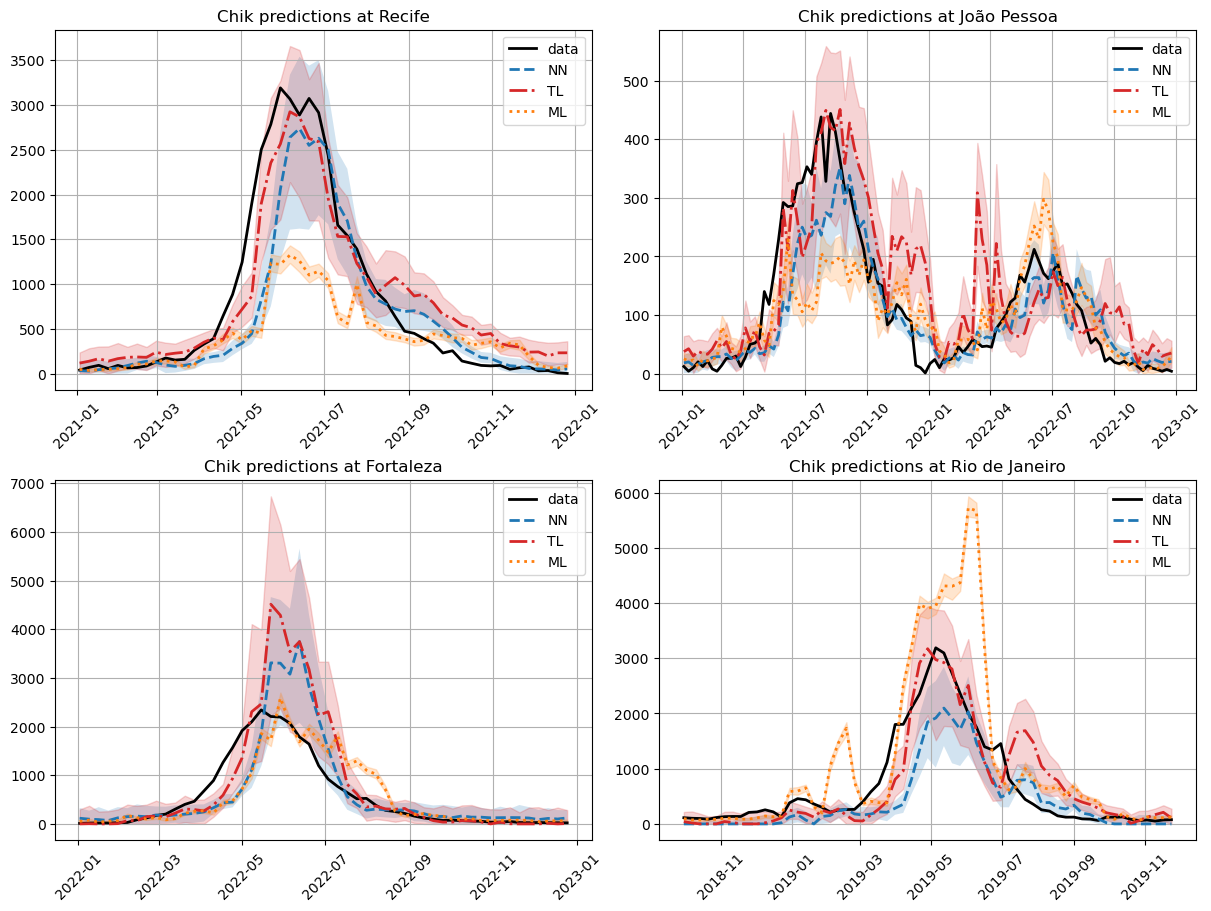

In [24]:
plot_comp_all()

## 